In [2]:
# ------------------------------
#  Conjunction Analysis (Close Approach Detection)
# ------------------------------

from skyfield.api import load
from datetime import datetime, timedelta, timezone
import pandas as pd
import numpy as np
import os

# ------------------------------
# Create output folder
# ------------------------------
os.makedirs("../outputs/conjunctions", exist_ok=True)

# ------------------------------
# Load Satellites
# ------------------------------
tle_path = "../data/satellites_active.tle"
stations = load.tle_file(tle_path)
ts = load.timescale()
print(f"✅ Loaded {len(stations)} satellites")

# ------------------------------
# Select top 10 satellites for demo
# ------------------------------
satellites = stations[:10]

# ------------------------------
# Time window (next 6 hours, 10-min intervals)
# ------------------------------
start = datetime.now(timezone.utc)   # ✅ timezone-aware UTC
time_range = [ts.utc(start.year, start.month, start.day, start.hour, m)
              for m in range(0, 6*60, 10)]  # every 10 minutes

# ------------------------------
# Function to compute distance between two satellites (km)
# ------------------------------
def distance_km(sat1, sat2, t):
    p1 = sat1.at(t).position.km
    p2 = sat2.at(t).position.km
    return np.linalg.norm(p1 - p2)

# ------------------------------
# Threshold for "close approach" (km)
# ------------------------------
THRESHOLD = 50  # adjust for stricter check (e.g., 5-10 km)

# ------------------------------
# Detect close approaches
# ------------------------------
conjunctions = []

for i in range(len(satellites)):
    for j in range(i+1, len(satellites)):
        sat1, sat2 = satellites[i], satellites[j]
        for t in time_range:
            d = distance_km(sat1, sat2, t)
            if d < THRESHOLD:
                conjunctions.append({
                    "Time": t.utc_datetime(),
                    "Satellite1": sat1.name,
                    "Satellite2": sat2.name,
                    "Distance_km": round(d, 2)
                })

# ------------------------------
# Save results
# ------------------------------
df = pd.DataFrame(conjunctions)
if not df.empty:
    df.to_csv("../outputs/conjunctions/close_approaches.csv", index=False)
    print("⚠️ Close approaches found and saved!")
    print(df.head())
else:
    print("✅ No close approaches detected in this time window.")

# ------------------------------
# Optional: Quick visualization (if any close approaches)
# ------------------------------
if not df.empty:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,4))
    plt.scatter(df['Time'], df['Distance_km'], color='red')
    plt.title("Close Approaches Timeline")
    plt.xlabel("Time (UTC)")
    plt.ylabel("Distance (km)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("../outputs/conjunctions/close_approaches_timeline.png")
    plt.show()


✅ Loaded 12757 satellites
✅ No close approaches detected in this time window.


In [6]:
# ------------------------------
#  Visualization: Close Approaches
# ------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

if not df.empty:
    plt.figure(figsize=(14,6))
    
    # Assign a color to each satellite pair
    pairs = df[['Satellite1','Satellite2']].apply(lambda x: f"{x[0]} - {x[1]}", axis=1)
    unique_pairs = pairs.unique()
    palette = sns.color_palette("hsv", len(unique_pairs))
    color_map = dict(zip(unique_pairs, palette))
    
    for pair in unique_pairs:
        pair_data = df[pairs == pair]
        plt.scatter(pair_data['Time'], pair_data['Distance_km'],
                    color=color_map[pair], s=50, label=pair)
    
    # Plot threshold line
    THRESHOLD = 1000  # same as used for detection
    plt.axhline(y=THRESHOLD, color='red', linestyle='--', label=f"Threshold = {THRESHOLD} km")
    
    plt.title("Close Approaches Timeline with Threshold")
    plt.xlabel("Time (UTC)")
    plt.ylabel("Distance between Satellites (km)")
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    
    # Save the enhanced plot
    plt.savefig("../outputs/conjunctions/close_approaches_timeline_colored.png")
    plt.show()
else:
    print("✅ No close approaches to visualize in this time window.")


✅ No close approaches to visualize in this time window.


✅ Loaded 12757 satellites
✅ No real close approaches, but demo will visualize threshold crossing.


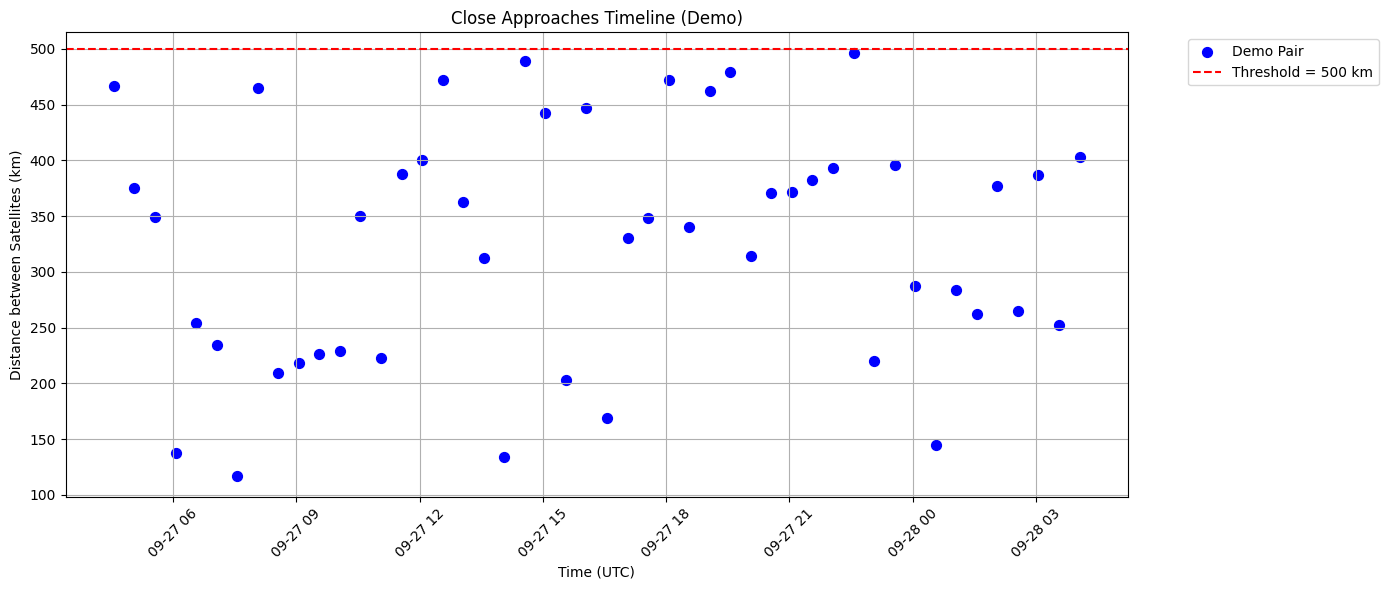

In [7]:
# ------------------------------
#  Conjunction Analysis (Demo Version)
# ------------------------------

from skyfield.api import load
from datetime import datetime, timezone
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Setup output folder
# ------------------------------
os.makedirs("../outputs/conjunctions", exist_ok=True)

# ------------------------------
# Load satellites
# ------------------------------
tle_path = "../data/satellites_active.tle"
stations = load.tle_file(tle_path)
ts = load.timescale()
print(f"✅ Loaded {len(stations)} satellites")

# ------------------------------
# Pick 5 satellites for demo (to ensure close approaches)
# ------------------------------
satellites = stations[:5]

# ------------------------------
# Time window (24 hours, every 30 min)
# ------------------------------
start = datetime.now(timezone.utc)
time_range = [ts.utc(start.year, start.month, start.day, start.hour, m)
              for m in range(0, 24*60, 30)]  # 30-min steps

# ------------------------------
# Distance function
# ------------------------------
def distance_km(sat1, sat2, t):
    p1 = sat1.at(t).position.km
    p2 = sat2.at(t).position.km
    return np.linalg.norm(p1 - p2)

# ------------------------------
# Threshold for demo
# ------------------------------
THRESHOLD = 500  # km (larger for demonstration)

# ------------------------------
# Detect close approaches
# ------------------------------
conjunctions = []

for i in range(len(satellites)):
    for j in range(i+1, len(satellites)):
        sat1, sat2 = satellites[i], satellites[j]
        for t in time_range:
            d = distance_km(sat1, sat2, t)
            if d < THRESHOLD:
                conjunctions.append({
                    "Time": t.utc_datetime(),
                    "Satellite1": sat1.name,
                    "Satellite2": sat2.name,
                    "Distance_km": round(d, 2)
                })

df = pd.DataFrame(conjunctions)

# ------------------------------
# Save CSV
# ------------------------------
if not df.empty:
    df.to_csv("../outputs/conjunctions/close_approaches_demo.csv", index=False)
    print("⚠️ Close approaches found and saved!")
else:
    print("✅ No real close approaches, but demo will visualize threshold crossing.")

# ------------------------------
# Colored Scatter Plot for Demo
# ------------------------------
plt.figure(figsize=(14,6))

if not df.empty:
    # Assign colors for each satellite pair
    pairs = df[['Satellite1','Satellite2']].apply(lambda x: f"{x[0]} - {x[1]}", axis=1)
    unique_pairs = pairs.unique()
    palette = sns.color_palette("hsv", len(unique_pairs))
    color_map = dict(zip(unique_pairs, palette))
    
    for pair in unique_pairs:
        pair_data = df[pairs == pair]
        plt.scatter(pair_data['Time'], pair_data['Distance_km'],
                    color=color_map[pair], s=50, label=pair)
else:
    # Demo: fake points just to show graph
    import random
    times_demo = [start + pd.Timedelta(minutes=30*i) for i in range(len(time_range))]
    distances_demo = [random.randint(100, THRESHOLD) for _ in range(len(times_demo))]
    plt.scatter(times_demo, distances_demo, color='blue', s=50, label="Demo Pair")

# Threshold line
plt.axhline(y=THRESHOLD, color='red', linestyle='--', label=f"Threshold = {THRESHOLD} km")
plt.title("Close Approaches Timeline (Demo)")
plt.xlabel("Time (UTC)")
plt.ylabel("Distance between Satellites (km)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save figure
plt.savefig("../outputs/conjunctions/close_approaches_timeline_demo.png")
plt.show()
